# `KNeighborClassifier` 파라미터
- `n_neighbor` : 분류 시 고려할 인접 샘플 수 (가장 가까운 이웃을 몇 개를 고를지에 대한 파라미터)
  - `default=5`
- `weights : `distance` - 인접한 샘플의 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치)
  - `default=uniform`
- `metric` : 거리 계산의 척도(`minkowski`, `euclidean`, `manhattan` 등)
  - `default='minkowski'`, `p`라는 매개 변수를 추가 사용 / `p=1`이면 `manhattan`, `p=2`이면 `euclidean`과 동일
  - ex : `KNeighborClassifier(n_neighbors=11, p=2, metric='minkowski')` `p=2`가 기본 값
- `n_jobs` : 사용할 코어의 개수, -1이면 전부 사용

# `Titanic` 예제
- Passengerid, Name, Ticket, Fare, Cabin 칼럼은 삭제
- Age는 평균, Embarked는 최빈값
- Sex는 레이블 인코딩, Embarked는 원-핫 인코딩
- 스케일링은 MinMaxScaler

최적의 k 찾기

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [33]:
df_train = pd.read_csv('./titanic/train.csv')

df_train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

df_train['Embarked'].fillna(df_train['Embarked'].value_counts().idxmax(), inplace=True)

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [34]:
from sklearn.preprocessing import LabelEncoder # 레이블 인코딩

le = LabelEncoder()

y_le = df_train['Sex']

Sex = le.fit_transform(df_train['Sex'])

df_train['Sex'] = Sex

df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,S
1,1,1,0,38.000000,1,0,C
2,1,3,0,26.000000,0,0,S
3,1,1,0,35.000000,1,0,S
4,0,3,1,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,S
887,1,1,0,19.000000,0,0,S
888,0,3,0,29.699118,1,2,S
889,1,1,1,26.000000,0,0,C


In [35]:
df_train.iloc[:, -1:]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [36]:
data_dummies = pd.get_dummies(df_train.iloc[:, 6:7])

data_dummies

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [37]:
df_train1 = df_train.iloc[:, 0:6]
df_train1

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [38]:
df_train_fin = pd.concat([df_train1, data_dummies], axis=1)
df_train_fin

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,0,0,1
1,1,1,0,38.000000,1,0,1,0,0
2,1,3,0,26.000000,0,0,0,0,1
3,1,1,0,35.000000,1,0,0,0,1
4,0,3,1,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,0,0,1
887,1,1,0,19.000000,0,0,0,0,1
888,0,3,0,29.699118,1,2,0,0,1
889,1,1,1,26.000000,0,0,1,0,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_train_fin, df_train['Survived'])

In [40]:
# 학습데이터 전처리 전처리(scale)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

print("X_train_scaled : \n", X_train_scaled)
print("X_test_scaled : \n", X_test_scaled)

X_train_scaled : 
 [[1.  0.  1.  ... 1.  0.  0. ]
 [1.  0.  0.  ... 1.  0.  0. ]
 [1.  0.5 0.  ... 0.  0.  1. ]
 ...
 [1.  0.  1.  ... 0.  0.  1. ]
 [0.  1.  1.  ... 0.  0.  1. ]
 [0.  0.  1.  ... 0.  0.  1. ]]
X_test_scaled : 
 [[0.  1.  1.  ... 0.  1.  0. ]
 [0.  1.  1.  ... 1.  0.  0. ]
 [0.  1.  1.  ... 0.  0.  1. ]
 ...
 [1.  0.  1.  ... 0.  0.  1. ]
 [1.  1.  1.  ... 1.  0.  0. ]
 [1.  0.5 0.  ... 0.  0.  1. ]]


In [41]:
# 모델 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 모델 예측 및 평가
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test_scaled)
score = accuracy_score(y_test, pred)

print('Test Score :', score)

Test Score : 1.0


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

estimator = KNeighborsClassifier()

cv = KFold(n_splits=10, random_state=42, shuffle=True)

parameters = {
  'n_neighbors' : list(range(1,50)),
  'weights' : ["uniform", "distance"],
  'metric' : ['euclidean', 'manhattan', 'minkowski'],
  # 'p' : [1, 2]
  }

model = GridSearchCV(
  estimator=estimator,
  param_grid=parameters,
  cv=cv,
  verbose=-1,
  n_jobs=-1,
  refit=True
)

model.fit(X_train, y_train)

print("Best Estimator:\n", model.best_estimator_);print()
print("Best Params:\n", model.best_params_);print()
print("Best Score:\n", model.best_score_);print()

Best Estimator:
 KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

Best Params:
 {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

Best Score:
 0.9460199004975124



# 농구선수 포지션 예측

In [43]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 그래프 출력을 위해 선언합니다.
%matplotlib inline
# sklearn 모델의 동일핚 결과 출력을 위해 선언합니다.
np.random.seed(5)

train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")

test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [44]:
train

,Player,Pos,3P,TRB,BLK
0,Denzel Valentine,SG,1.3,2.6,0.1
1,Kyle Korver,SG,2.4,2.8,0.3
2,Troy Daniels,SG,2.1,1.5,0.1
3,Tim Hardaway,SG,1.9,2.8,0.2
4,Dewayne Dedmon,C,0.0,6.5,0.8
...,...,...,...,...,...
75,Victor Oladipo,SG,1.9,4.3,0.3
76,Willie Cauley-Stein,C,0.0,4.5,0.6
77,Brook Lopez,C,1.8,5.4,1.7
78,Josh Richardson,SG,1.4,3.2,0.7


In [45]:
test

,Player,Pos,3P,TRB,BLK
0,JaVale McGee,C,0.0,3.2,0.9
1,Manu Ginobili,SG,1.3,2.3,0.2
2,Nene Hilario,C,0.0,4.2,0.6
3,Evan Fournier,SG,1.9,3.1,0.1
4,Georgios Papagiannis,C,0.0,3.9,0.8
5,Anthony Davis,C,0.5,11.8,2.2
6,Tarik Black,C,0.0,5.1,0.7
7,Jamal Crawford,SG,1.4,1.6,0.2
8,Jordan Clarkson,SG,1.4,3.0,0.1
9,Marcin Gortat,C,0.0,10.4,0.7


In [46]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate

max_k_range = train.shape[0] // 2

k_list = []

for i in range(3, max_k_range, 2) :
  k_list.append(i)

cross_validation_scores = []

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(
    knn,
    x_train,
    y_train.values.ravel(),
    cv=10,
    scoring='accuracy'
  )
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

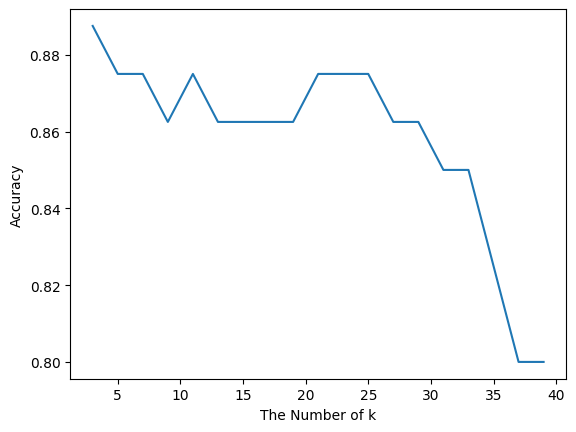

In [47]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('The Number of k')
plt.ylabel('Accuracy')
plt.show()

In [48]:
cvs = cross_validation_scores

k = k_list[cvs.index(max(cross_validation_scores))]

print('The Best Number of k : ' + str(k))
# The Best Number of k : 3

The Best Number of k : 3


In [49]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)
pred
# array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C',
#        'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [50]:
comparison = pd.DataFrame(
  {
    'prediction': pred,
    'ground_truth': y_test.values.ravel()
  }
)

print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))
# accuracy : 1.0

accuracy : 1.0


In [51]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)
pred
# array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
#        'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [52]:
comparison = pd.DataFrame(
  {
    'prediction': pred,
    'ground_truth': y_test.values.ravel()
  }
)

print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.95
